## Prepare the surface fault rupture

#### Reference
+ Reitman, Nadine G, Richard W. Briggs, William D. Barnhart, Jessica A. Thompson Jobe, Christopher B. DuRoss, Alexandra E. Hatem, Ryan D. Gold, John D. Mejstrik, and Sinan Akçiz (2023) Preliminary fault rupture mapping of the 2023 M7.8 and M7.5 Türkiye Earthquakes. DOI: https://doi.org/10.5066/P985I7U2. Access date: 16 May 2023.

In [1]:
%matplotlib inline
import datetime
import os
import geopandas as gpd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

version = '2023-03-15'   # 2023-02-17, 2023-03-15
work_dir = os.path.expanduser(f'~/data/archives/2023TurkeyEQ/USGS/simple_fault_{version}')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-03-15


### Read shape file

In [2]:
# read shape file
suffix = datetime.date.fromisoformat(version).strftime('%Y-%-m-%d')
shp_file = os.path.join(work_dir, f'simple_fault_{suffix}.shp')
gdf = gpd.read_file(shp_file)
line_strs = [geom for geom in gdf.geometry]
line_ids = gdf.FaultTrace     # 1 is “confident” (solid lines) and 2 is “queried” (dashed lines)
# remove lines with None
line_ids = [x for x, y in zip(line_ids, line_strs) if y]
line_strs = [y for y in line_strs if y]

### Plot faults

save figure to file /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/fault_2023-03-15.png


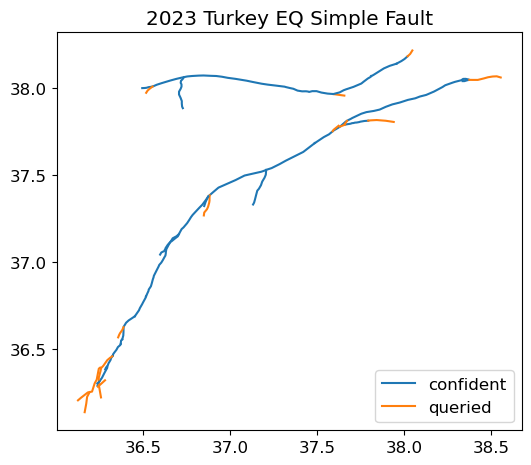

In [3]:
# plot
flag1, flag2 = 0, 0
fig, ax = plt.subplots(figsize=[6, 6])
for line, line_id in zip(line_strs, line_ids):
    kwargs = dict(color = 'C0' if line_id == 1 else 'C1')
    # label the first fault segment for legend
    if not flag1 and line_id == 1:
        kwargs['label'] = 'confident'
        flag1 = 1
    elif not flag2 and line_id == 2:
        kwargs['label'] = 'queried'
        flag2 = 1
    ax.plot(line.coords.xy[0], line.coords.xy[1], **kwargs)
# axis format
ax.set_title('2023 Turkey EQ Simple Fault')
ax.set_aspect('equal')
ax.legend()
# save
out_fig = os.path.abspath(f'../fault_{version}.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### Save to GMT lonlat file

In [4]:
for suffix, ref_id in zip(['_confident', '_queried'], [1, 2]):
    out_file = os.path.join(work_dir, f'../simple_fault{suffix}.lonlat')
    num_line = 0
    with open(out_file, 'w') as f:
        for line_str, line_id in zip(line_strs, line_ids):
            if line_id == ref_id:
                # new line - start
                num_line += 1
                f.write(f'> segment {num_line}\n')
                xs, ys = line_str.coords.xy
                for x, y in zip(xs, ys):
                    f.write(f'{x:.9f}\t{y:.9f}\n')
    print(f'write file: {out_file}')

write file: /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-03-15/../simple_fault_confident.lonlat
write file: /Users/yunjunz/data/archives/2023TurkeyEQ/USGS/simple_fault_2023-03-15/../simple_fault_queried.lonlat
